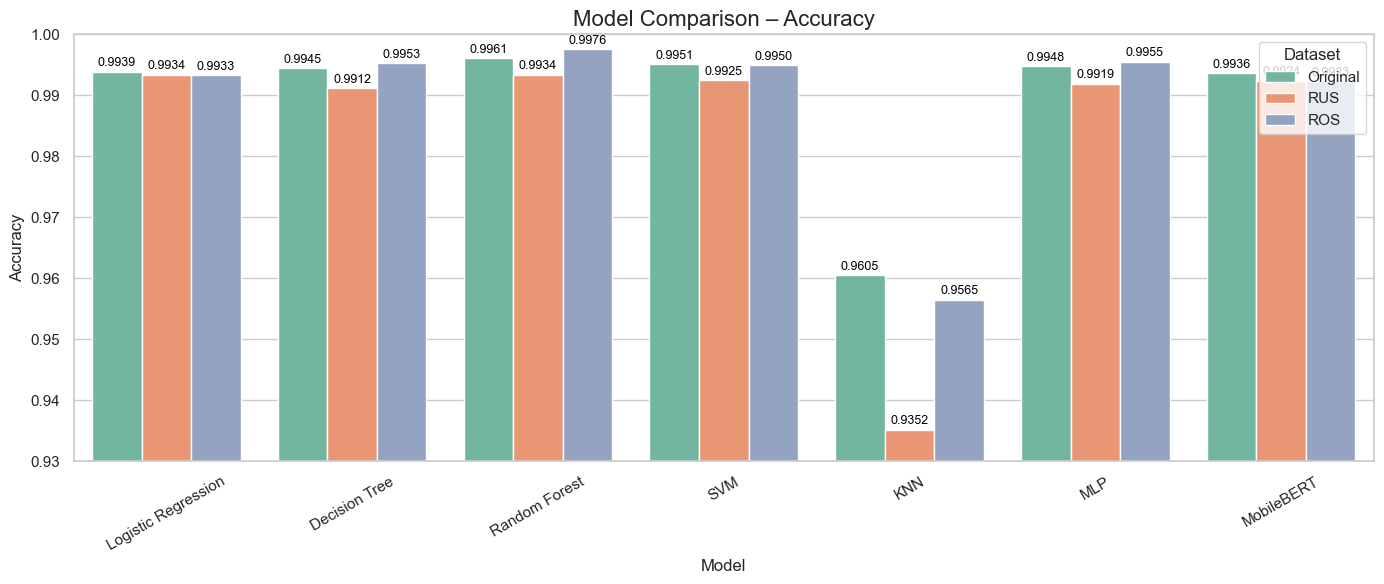

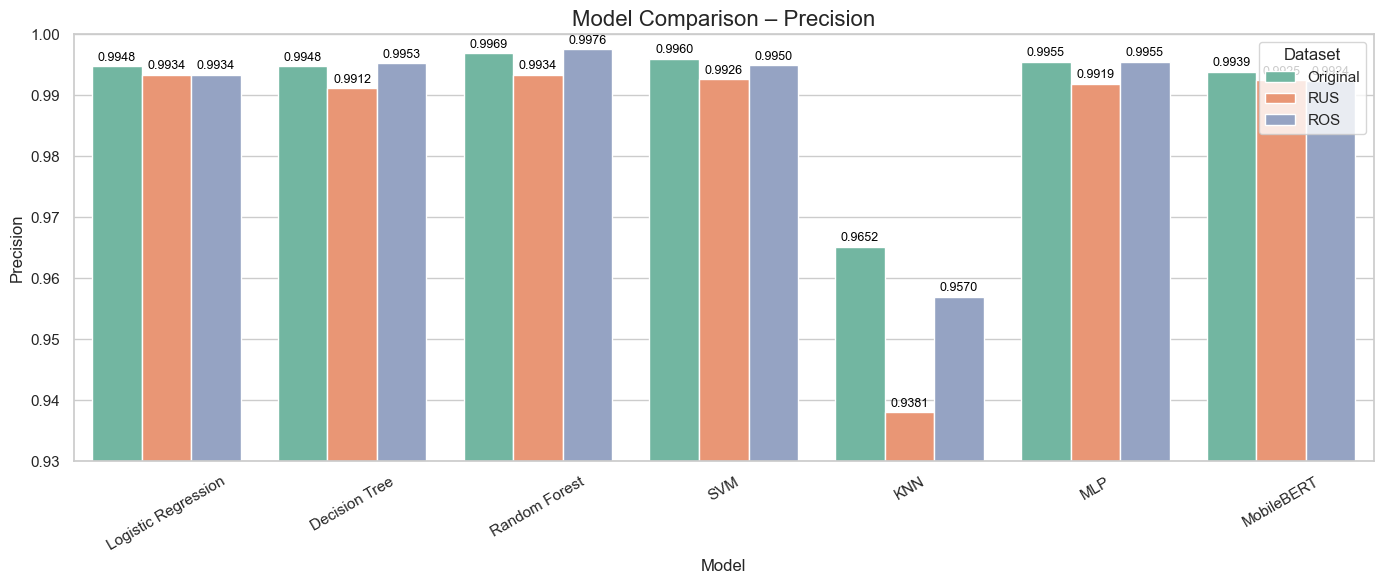

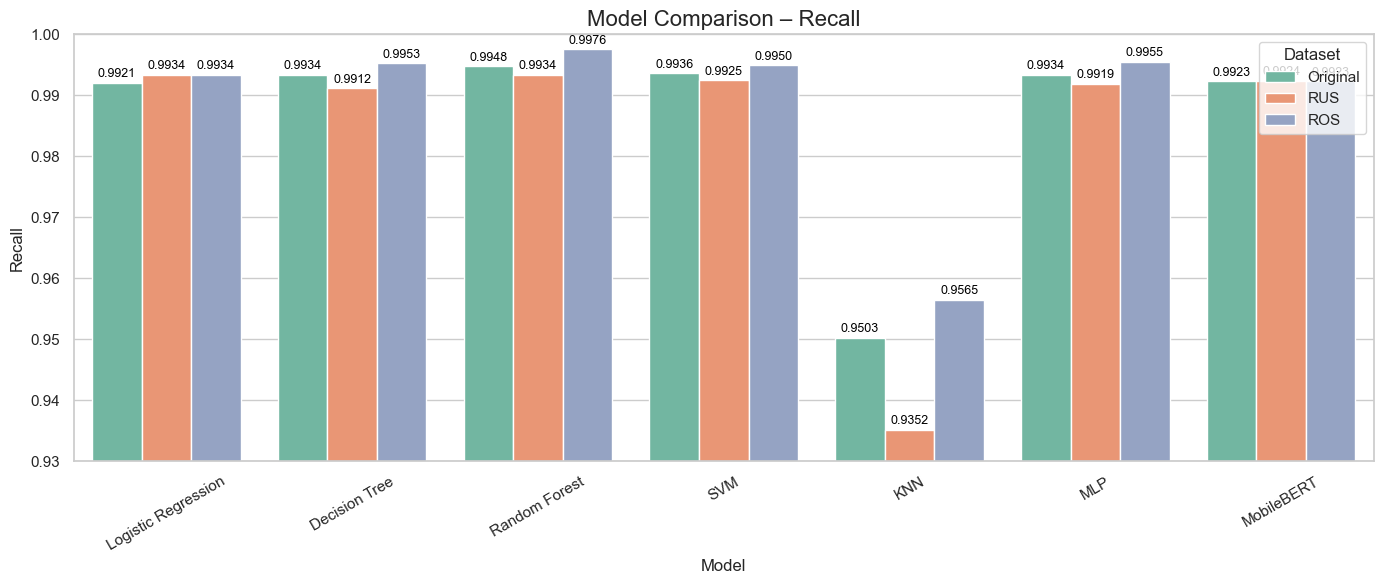

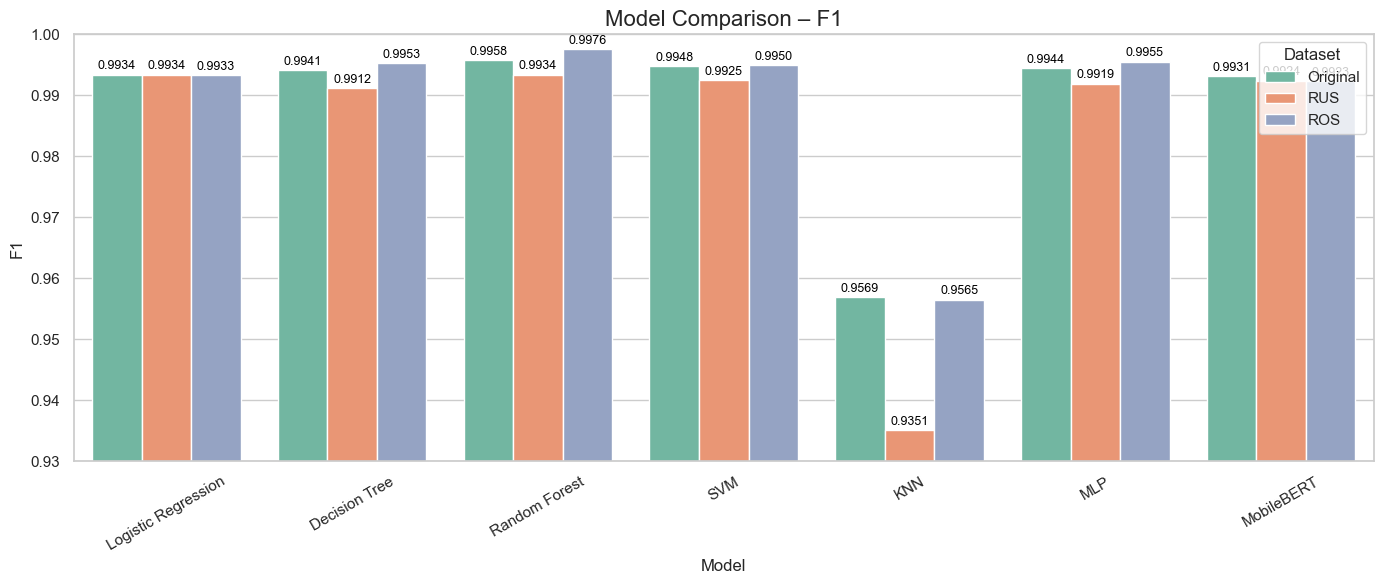

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation metrics
combined_results = [
    {"Model": "Logistic Regression", "Dataset": "Original", "Accuracy": 0.9939, "Precision": 0.9948, "Recall": 0.9921, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "ROS", "Accuracy": 0.9933, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9933},

    {"Model": "Decision Tree", "Dataset": "Original", "Accuracy": 0.9945, "Precision": 0.9948, "Recall": 0.9934, "F1": 0.9941},
    {"Model": "Decision Tree", "Dataset": "RUS", "Accuracy": 0.9912, "Precision": 0.9912, "Recall": 0.9912, "F1": 0.9912},
    {"Model": "Decision Tree", "Dataset": "ROS", "Accuracy": 0.9953, "Precision": 0.9953, "Recall": 0.9953, "F1": 0.9953},

    {"Model": "Random Forest", "Dataset": "Original", "Accuracy": 0.9961, "Precision": 0.9969, "Recall": 0.9948, "F1": 0.9958},
    {"Model": "Random Forest", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Random Forest", "Dataset": "ROS", "Accuracy": 0.9976, "Precision": 0.9976, "Recall": 0.9976, "F1": 0.9976},

    {"Model": "SVM", "Dataset": "Original", "Accuracy": 0.9951, "Precision": 0.9960, "Recall": 0.9936, "F1": 0.9948},
    {"Model": "SVM", "Dataset": "RUS", "Accuracy": 0.9925, "Precision": 0.9926, "Recall": 0.9925, "F1": 0.9925},
    {"Model": "SVM", "Dataset": "ROS", "Accuracy": 0.9950, "Precision": 0.9950, "Recall": 0.9950, "F1": 0.9950},

    {"Model": "KNN", "Dataset": "Original", "Accuracy": 0.9605, "Precision": 0.9652, "Recall": 0.9503, "F1": 0.9569},
    {"Model": "KNN", "Dataset": "RUS", "Accuracy": 0.9352, "Precision": 0.9381, "Recall": 0.9352, "F1": 0.9351},
    {"Model": "KNN", "Dataset": "ROS", "Accuracy": 0.9565, "Precision": 0.9570, "Recall": 0.9565, "F1": 0.9565},

    {"Model": "MLP", "Dataset": "Original", "Accuracy": 0.9948, "Precision": 0.9955, "Recall": 0.9934, "F1": 0.9944},
    {"Model": "MLP", "Dataset": "RUS", "Accuracy": 0.9919, "Precision": 0.9919, "Recall": 0.9919, "F1": 0.9919},
    {"Model": "MLP", "Dataset": "ROS", "Accuracy": 0.9955, "Precision": 0.9955, "Recall": 0.9955, "F1": 0.9955},

    {"Model": "MobileBERT", "Dataset": "Original", "Accuracy": 0.9936, "Precision": 0.9939, "Recall": 0.9923, "F1": 0.9931},
    {"Model": "MobileBERT", "Dataset": "RUS", "Accuracy": 0.9924, "Precision": 0.9925, "Recall": 0.9924, "F1": 0.9924},
    {"Model": "MobileBERT", "Dataset": "ROS", "Accuracy": 0.9923, "Precision": 0.9924, "Recall": 0.9923, "F1": 0.9923},
]

# Convert to DataFrame
df = pd.DataFrame(combined_results)

# Set seaborn theme
sns.set(style="whitegrid")

# Plot all metrics
metrics = ["Accuracy", "Precision", "Recall", "F1"]
for metric in metrics:
    plt.figure(figsize=(14, 6))
    ax = sns.barplot(data=df, x="Model", y=metric, hue="Dataset", palette="Set2")
    plt.title(f"Model Comparison – {metric}", fontsize=16)
    plt.ylim(0.93, 1.0)
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=30)
    plt.legend(title="Dataset", loc='upper right')
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 6),
                    textcoords='offset points')
    plt.tight_layout()
    plt.show()


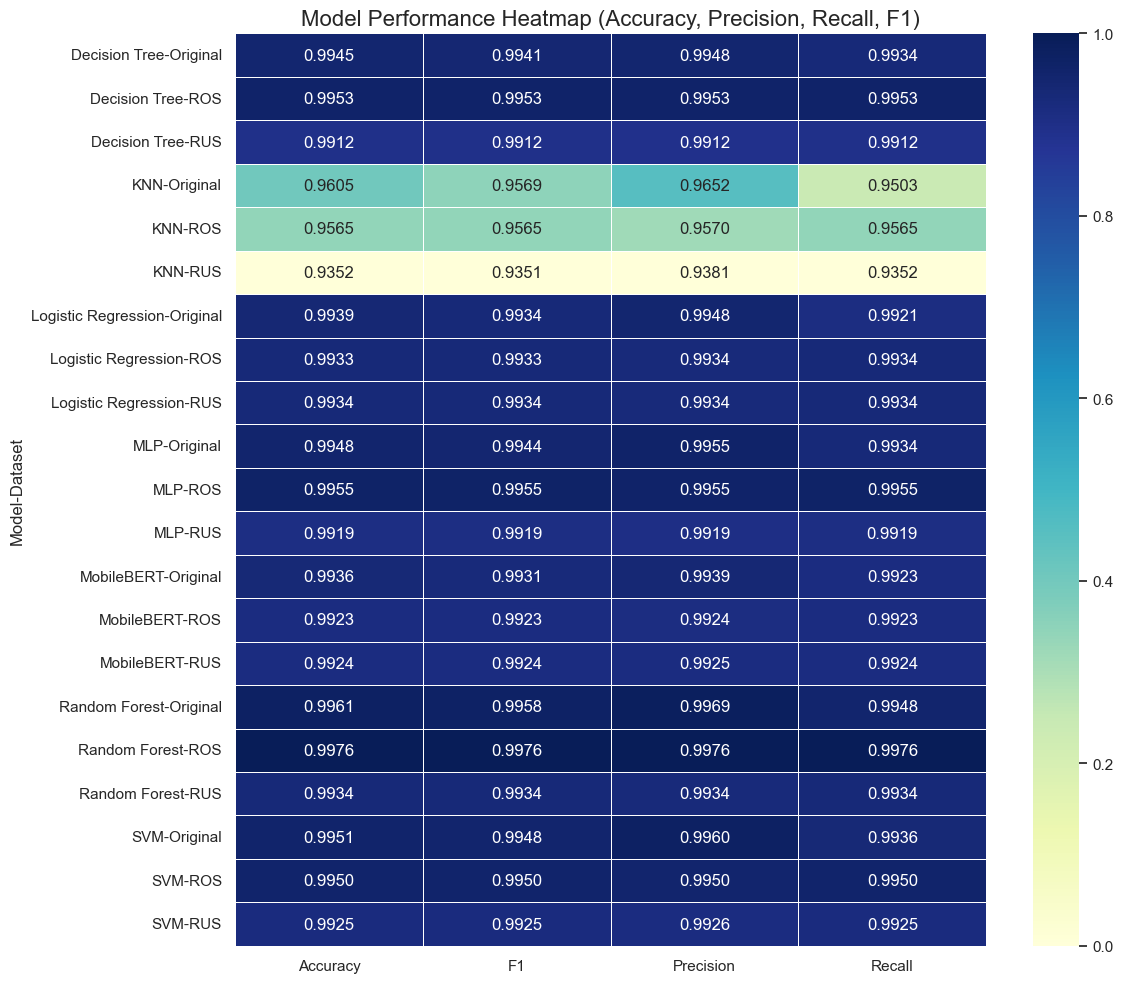

In [3]:
# Pivot for heatmap
heatmap_data = df.pivot_table(index=["Model", "Dataset"], values=["Accuracy", "Precision", "Recall", "F1"])

# Normalize for better heatmap scale
normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Plotting
plt.figure(figsize=(12, 10))
sns.heatmap(normalized, annot=heatmap_data.round(4), cmap="YlGnBu", fmt=".4f", linewidths=.5)
plt.title("Model Performance Heatmap (Accuracy, Precision, Recall, F1)", fontsize=16)
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Original results
combined_results = [
    {"Model": "Logistic Regression", "Dataset": "Original", "Accuracy": 0.9939},
    {"Model": "Decision Tree", "Dataset": "Original", "Accuracy": 0.9945},
    {"Model": "Random Forest", "Dataset": "Original", "Accuracy": 0.9961},
    {"Model": "SVM", "Dataset": "Original", "Accuracy": 0.9951},
    {"Model": "KNN", "Dataset": "Original", "Accuracy": 0.9605},
    {"Model": "MLP", "Dataset": "Original", "Accuracy": 0.9948},
    {"Model": "MobileBERT", "Dataset": "Original", "Accuracy": 0.9936},
]

df = pd.DataFrame(combined_results)

# Groups
ml_models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "KNN"]
ml_models_without_knn = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
dl_models = ["MLP", "MobileBERT"]

# Compute averages
ml_avg = df[df["Model"].isin(ml_models)]["Accuracy"].mean()
ml_no_knn_avg = df[df["Model"].isin(ml_models_without_knn)]["Accuracy"].mean()
dl_avg = df[df["Model"].isin(dl_models)]["Accuracy"].mean()

avg_df = pd.DataFrame({
    "Category": ["ML (All)", "ML (Without KNN)", "DL (All)"],
    "Accuracy": [ml_avg, ml_no_knn_avg, dl_avg]
})


C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_4748\3471076019.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_df, x="Category", y="Accuracy", palette="Pastel1")


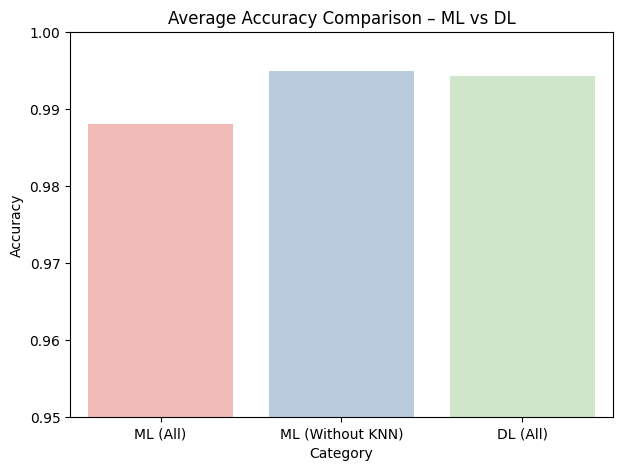

In [3]:
plt.figure(figsize=(7,5))
sns.barplot(data=avg_df, x="Category", y="Accuracy", palette="Pastel1")
plt.title("Average Accuracy Comparison – ML vs DL")
plt.ylim(0.95, 1.0)
plt.show()

C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_4748\2177497641.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ml_knn_df, x="Category", y="Accuracy", palette=["#4CAF50", "#F44336"])


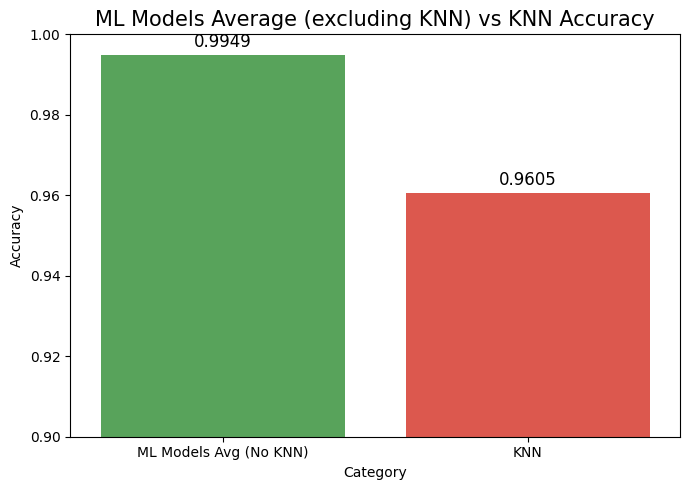

In [4]:
# ==== ML AVERAGE (EXCEPT KNN) vs KNN ====

# Get ML models excluding KNN
ml_models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
ml_avg = df[df["Model"].isin(ml_models)]["Accuracy"].mean()

# Get KNN value
knn_value = df[df["Model"] == "KNN"]["Accuracy"].values[0]

# Create new simple DataFrame for this chart
ml_knn_df = pd.DataFrame({
    "Category": ["ML Models Avg (No KNN)", "KNN"],
    "Accuracy": [ml_avg, knn_value]
})

plt.figure(figsize=(7,5))
sns.barplot(data=ml_knn_df, x="Category", y="Accuracy", palette=["#4CAF50", "#F44336"])

plt.title("ML Models Average (excluding KNN) vs KNN Accuracy", fontsize=15)
plt.ylim(0.90, 1.0)

# Add labels
for index, row in ml_knn_df.iterrows():
    plt.text(index, row["Accuracy"] + 0.002, f"{row['Accuracy']:.4f}",
             ha='center', fontsize=12)

plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_4748\880221737.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ml_dl_df, x="Category", y="Accuracy", palette=["#1976D2", "#9C27B0"])


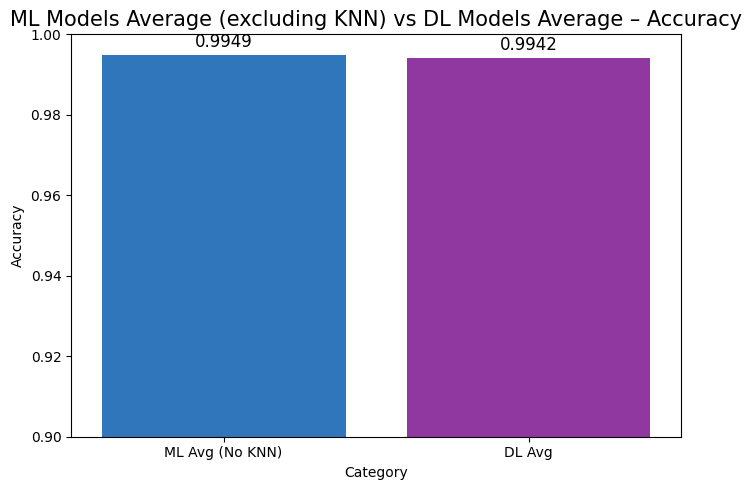

In [7]:
# === CHART 2: ML Avg (No KNN) vs DL Avg ===

# ML and DL model names
ml_models_no_knn = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
dl_models = ["MLP", "MobileBERT"]

# Compute averages
ml_avg_accuracy = df[df["Model"].isin(ml_models_no_knn)]["Accuracy"].mean()
dl_avg_accuracy = df[df["Model"].isin(dl_models)]["Accuracy"].mean()

# DataFrame for plotting
ml_dl_df = pd.DataFrame({
    "Category": ["ML Avg (No KNN)", "DL Avg"],
    "Accuracy": [ml_avg_accuracy, dl_avg_accuracy]
})

plt.figure(figsize=(7,5))
sns.barplot(data=ml_dl_df, x="Category", y="Accuracy", palette=["#1976D2", "#9C27B0"])

plt.title("ML Models Average (excluding KNN) vs DL Models Average – Accuracy", fontsize=15)
plt.ylim(0.90, 1.0)

# Add value labels
for index, row in ml_dl_df.iterrows():
    plt.text(index, row["Accuracy"] + 0.002, f"{row['Accuracy']:.4f}",
             ha='center', fontsize=12)

plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_4748\2456081303.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart1_df, x="Category", y="Accuracy", palette="Set2")


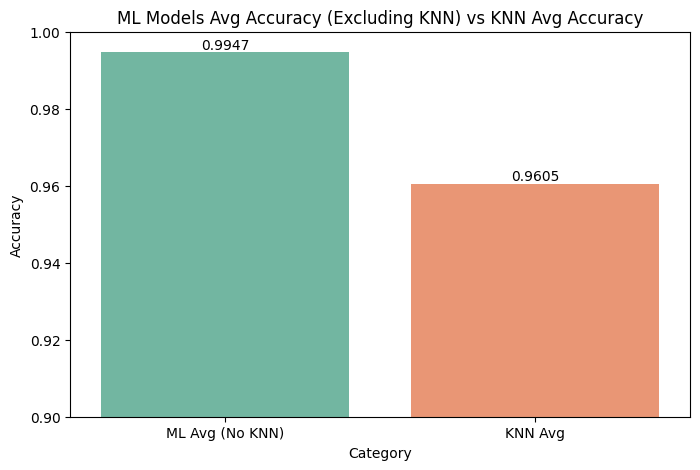

C:\Users\yash sojitra\AppData\Local\Temp\ipykernel_4748\2456081303.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart2_df, x="Category", y="Accuracy", palette="Set1")


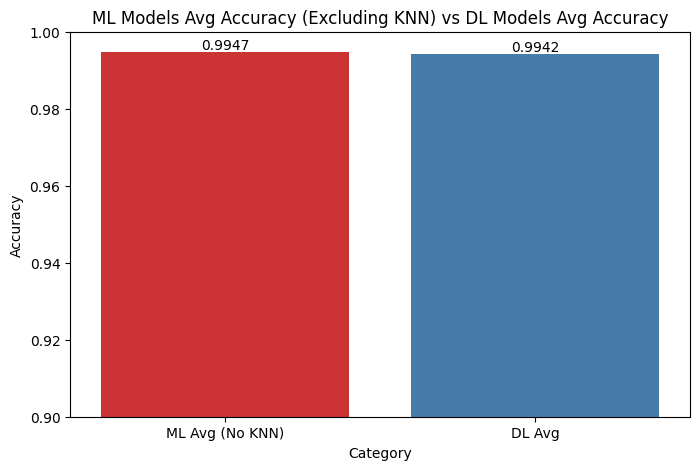

In [12]:
# -----------------------------------------
# MODEL GROUPS
# -----------------------------------------
ml_no_knn = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "MLP", "MobileBERT"]
dl_models = ["MLP", "MobileBERT"]

# -----------------------------------------
# COMPUTE AVERAGES
# -----------------------------------------

# ML avg accuracy (exclude KNN)
ml_no_knn_acc = df[df["Model"].isin(ml_no_knn)]["Accuracy"].mean()

# KNN avg accuracy
knn_acc = df[df["Model"] == "KNN"]["Accuracy"].mean()

# DL avg accuracy
dl_acc = df[df["Model"].isin(dl_models)]["Accuracy"].mean()

# -----------------------------------------
# CHART 1: ML avg vs KNN
# -----------------------------------------

chart1_df = pd.DataFrame({
    "Category": ["ML Avg (No KNN)", "KNN Avg"],
    "Accuracy": [ml_no_knn_acc, knn_acc]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=chart1_df, x="Category", y="Accuracy", palette="Set2")
plt.title("ML Models Avg Accuracy (Excluding KNN) vs KNN Avg Accuracy")
plt.ylim(0.90, 1.0)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.4f}",
                       (p.get_x() + p.get_width()/2, p.get_height()),
                       ha='center', va='bottom')

plt.show()


# -----------------------------------------
# CHART 2: ML avg vs DL avg
# -----------------------------------------

chart2_df = pd.DataFrame({
    "Category": ["ML Avg (No KNN)", "DL Avg"],
    "Accuracy": [ml_no_knn_acc, dl_acc]
})

plt.figure(figsize=(8, 5))
sns.barplot(data=chart2_df, x="Category", y="Accuracy", palette="Set1")
plt.title("ML Models Avg Accuracy (Excluding KNN) vs DL Models Avg Accuracy")
plt.ylim(0.90, 1.0)

for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.4f}",
                       (p.get_x() + p.get_width()/2, p.get_height()),
                       ha='center', va='bottom')

plt.show()


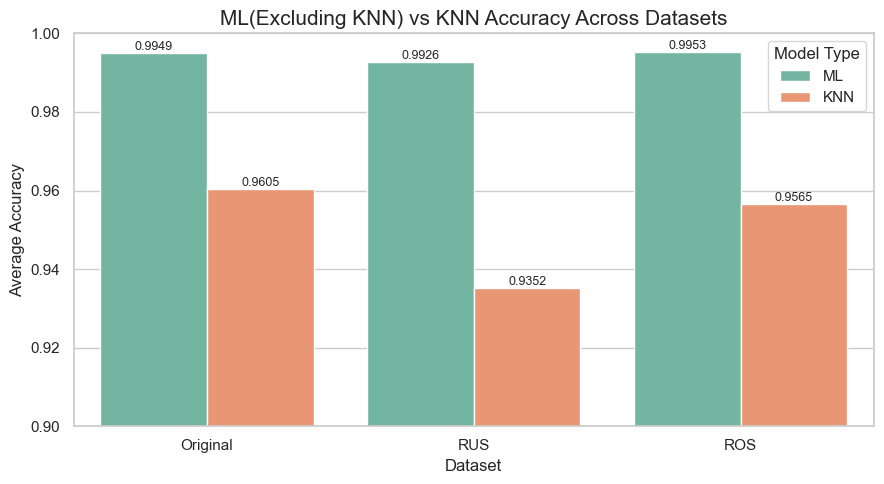

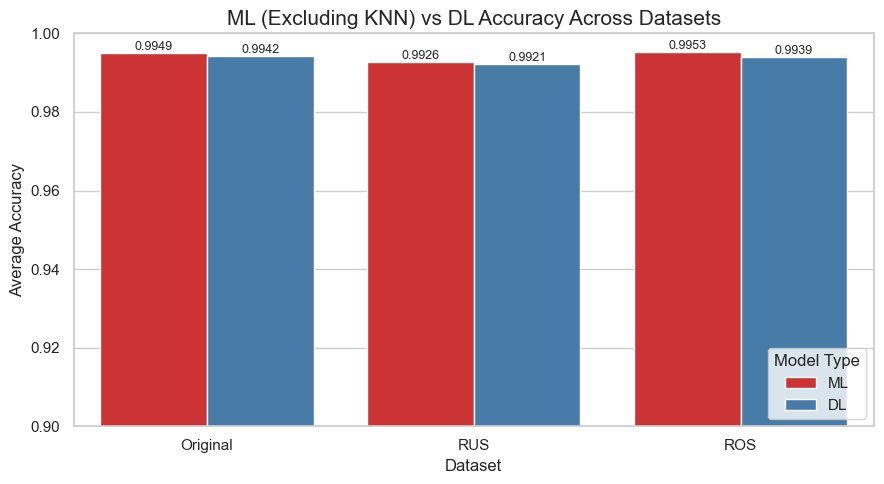

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Model evaluation metrics
combined_results = [
    {"Model": "Logistic Regression", "Dataset": "Original", "Accuracy": 0.9939, "Precision": 0.9948, "Recall": 0.9921, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Logistic Regression", "Dataset": "ROS", "Accuracy": 0.9933, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9933},

    {"Model": "Decision Tree", "Dataset": "Original", "Accuracy": 0.9945, "Precision": 0.9948, "Recall": 0.9934, "F1": 0.9941},
    {"Model": "Decision Tree", "Dataset": "RUS", "Accuracy": 0.9912, "Precision": 0.9912, "Recall": 0.9912, "F1": 0.9912},
    {"Model": "Decision Tree", "Dataset": "ROS", "Accuracy": 0.9953, "Precision": 0.9953, "Recall": 0.9953, "F1": 0.9953},

    {"Model": "Random Forest", "Dataset": "Original", "Accuracy": 0.9961, "Precision": 0.9969, "Recall": 0.9948, "F1": 0.9958},
    {"Model": "Random Forest", "Dataset": "RUS", "Accuracy": 0.9934, "Precision": 0.9934, "Recall": 0.9934, "F1": 0.9934},
    {"Model": "Random Forest", "Dataset": "ROS", "Accuracy": 0.9976, "Precision": 0.9976, "Recall": 0.9976, "F1": 0.9976},

    {"Model": "SVM", "Dataset": "Original", "Accuracy": 0.9951, "Precision": 0.9960, "Recall": 0.9936, "F1": 0.9948},
    {"Model": "SVM", "Dataset": "RUS", "Accuracy": 0.9925, "Precision": 0.9926, "Recall": 0.9925, "F1": 0.9925},
    {"Model": "SVM", "Dataset": "ROS", "Accuracy": 0.9950, "Precision": 0.9950, "Recall": 0.9950, "F1": 0.9950},

    {"Model": "KNN", "Dataset": "Original", "Accuracy": 0.9605, "Precision": 0.9652, "Recall": 0.9503, "F1": 0.9569},
    {"Model": "KNN", "Dataset": "RUS", "Accuracy": 0.9352, "Precision": 0.9381, "Recall": 0.9352, "F1": 0.9351},
    {"Model": "KNN", "Dataset": "ROS", "Accuracy": 0.9565, "Precision": 0.9570, "Recall": 0.9565, "F1": 0.9565},

    {"Model": "MLP", "Dataset": "Original", "Accuracy": 0.9948, "Precision": 0.9955, "Recall": 0.9934, "F1": 0.9944},
    {"Model": "MLP", "Dataset": "RUS", "Accuracy": 0.9919, "Precision": 0.9919, "Recall": 0.9919, "F1": 0.9919},
    {"Model": "MLP", "Dataset": "ROS", "Accuracy": 0.9955, "Precision": 0.9955, "Recall": 0.9955, "F1": 0.9955},

    {"Model": "MobileBERT", "Dataset": "Original", "Accuracy": 0.9936, "Precision": 0.9939, "Recall": 0.9923, "F1": 0.9931},
    {"Model": "MobileBERT", "Dataset": "RUS", "Accuracy": 0.9924, "Precision": 0.9925, "Recall": 0.9924, "F1": 0.9924},
    {"Model": "MobileBERT", "Dataset": "ROS", "Accuracy": 0.9923, "Precision": 0.9924, "Recall": 0.9923, "F1": 0.9923},
]

avg_knn_original=0.9605
avg_knn_rus=0.9352
avg_knn_ros=0.9565

# ---------------

ml_no_knn = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
sum_original=0
avg_original=0
for i in combined_results:
    if (i["Model"] in ml_no_knn) & (i["Dataset"]=="Original") :
        sum_original += i["Accuracy"]
avg_original = sum_original/4

sum_rus=0
avg_rus=0
for i in combined_results:
    if (i["Model"] in ml_no_knn) & (i["Dataset"]=="RUS") :
        sum_rus += i["Accuracy"]
avg_rus = sum_rus/4

ml_no_knn = ["Logistic Regression", "Decision Tree", "Random Forest", "SVM"]
sum_ros=0
avg_ros=0
for i in combined_results:
    if (i["Model"] in ml_no_knn) & (i["Dataset"]=="ROS") :
        sum_ros += i["Accuracy"]
avg_ros = sum_ros/4

# ---------------

dl = ["MobileBERT", "MLP"]
sum_dl_original=0
avg_dl_original=0
for i in combined_results:
    if (i["Model"] in dl) & (i["Dataset"]=="Original") :
        sum_dl_original += i["Accuracy"]
avg_dl_original = sum_dl_original/2

sum_dl_rus=0
avg_dl_rus=0
for i in combined_results:
    if (i["Model"] in dl) & (i["Dataset"]=="RUS") :
        sum_dl_rus += i["Accuracy"]
avg_dl_rus = sum_dl_rus/2

sum_dl_ros=0
avg_dl_ros=0
for i in combined_results:
    if (i["Model"] in dl) & (i["Dataset"]=="ROS") :
        sum_dl_ros += i["Accuracy"]
avg_dl_ros = sum_dl_ros/2

# =====================

# Data for plotting
chart_df = pd.DataFrame({
    "Dataset": ["Original", "RUS", "ROS"],
    "ML": [avg_original, avg_rus, avg_ros],
    "KNN": [avg_knn_original, avg_knn_rus, avg_knn_ros]
})

# Melt for seaborn grouped barplot
chart_df_melt = chart_df.melt(id_vars="Dataset",
                              var_name="Model Type",
                              value_name="Accuracy")

# Plot
plt.figure(figsize=(9, 5))
sns.barplot(data=chart_df_melt, x="Dataset", y="Accuracy",
            hue="Model Type", palette="Set2")

plt.ylim(0.90, 1.0)
plt.title("ML(Excluding KNN) vs KNN Accuracy Across Datasets", fontsize=15)
plt.ylabel("Average Accuracy")
plt.xlabel("Dataset")
plt.legend(title="Model Type", loc='upper right')

# Add values above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# =====================
# ===================== SECOND CHART (ML vs DL) =====================

chart_df2 = pd.DataFrame({
    "Dataset": ["Original", "RUS", "ROS"],
    "ML": [avg_original, avg_rus, avg_ros],
    "DL": [avg_dl_original, avg_dl_rus, avg_dl_ros]
})

# Melt for grouped barplot
chart_df2_melt = chart_df2.melt(id_vars="Dataset",
                                var_name="Model Type",
                                value_name="Accuracy")

plt.figure(figsize=(9, 5))
sns.barplot(data=chart_df2_melt, x="Dataset", y="Accuracy",
            hue="Model Type", palette="Set1")

plt.ylim(0.90, 1.0)
plt.title("ML (Excluding KNN) vs DL Accuracy Across Datasets", fontsize=15)
plt.ylabel("Average Accuracy")
plt.xlabel("Dataset")
plt.legend(title="Model Type", loc='lower right')

# Add accuracy labels
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f"{p.get_height():.4f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
